### Import Libraries

In [2]:
#Major libraries
import pandas as pd
import numpy as np

#Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

#stats imports
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import levene

## Data Summary and Cleaning

In [3]:
df=pd.read_csv("Age_Prediction.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

In [5]:
df.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


In [6]:
df.tail()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
2995,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,...,Diabetes,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22
2996,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,...,Heart Disease,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19
2997,Male,177.857644,86.258847,159/116,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,...,NaN,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85
2998,Female,162.287164,41.371018,134/82,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,...,Hypertension,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,NaN,High,30
2999,Male,175.341710,78.718038,167/91,279.118184,25.603762,156.577316,0.704319,0.578625,43.926230,...,Hypertension,60.892114,Poor,Insomnia,8.013913,4.624968,3.745138,High School,High,66


In [7]:
df.isna().sum()

Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64

In [8]:
df

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,...,Diabetes,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22
2996,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,...,Heart Disease,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19
2997,Male,177.857644,86.258847,159/116,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,...,NaN,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85
2998,Female,162.287164,41.371018,134/82,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,...,Hypertension,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,NaN,High,30


In [9]:
df.dropna()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
8,Female,164.546917,74.405356,152/119,204.235608,27.480504,137.022297,1.047384,0.505928,54.105122,...,Diabetes,64.702746,Fair,Insomnia,1.392434,9.945505,5.639334,High School,High,50
12,Male,173.338256,102.464068,145/108,289.219136,34.102228,124.845940,0.651341,0.402461,84.370333,...,Heart Disease,61.341635,Fair,Normal,2.156503,8.112042,9.847674,Undergraduate,High,65
13,Female,159.081403,67.075983,151/79,193.210429,26.505025,102.106584,1.792692,0.745991,37.794355,...,Hypertension,70.661083,Fair,Normal,3.250148,5.805440,10.405399,Undergraduate,Low,25
14,Male,180.777914,89.762116,143/101,220.229793,27.466438,139.479575,1.024116,0.615397,40.789595,...,Diabetes,59.769053,Fair,Insomnia,8.124211,7.896181,1.094473,High School,Low,47
16,Female,165.885349,70.360265,154/109,233.277936,25.568863,133.941160,0.983522,0.399878,50.240925,...,Diabetes,63.325924,Fair,Normal,9.110422,0.454464,3.371558,Postgraduate,High,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,Female,159.986635,66.470851,161/106,279.793544,25.969515,147.392409,0.543465,0.415831,47.283306,...,Heart Disease,55.146851,Fair,Normal,4.121429,2.019825,8.573972,Undergraduate,High,74
2966,Male,170.795008,83.053739,162/89,228.003562,28.471401,149.900801,0.863500,0.553612,54.041099,...,Diabetes,76.114848,Poor,Normal,9.050376,5.063930,8.984893,High School,Medium,54
2968,Female,166.153566,43.082307,144/103,208.249288,15.605570,126.197608,1.209967,0.579894,51.492807,...,Diabetes,61.594551,Fair,Normal,1.556713,2.470068,9.062809,Undergraduate,Low,51
2981,Female,159.996625,69.706681,125/99,216.291413,27.230321,114.214435,1.358058,0.670803,23.416874,...,Hypertension,85.371876,Excellent,Insomnia,6.330091,5.742652,7.180550,Postgraduate,Medium,32


We lose a lot of data if we drop rowswith null value.

In [10]:
df[['Alcohol Consumption','Age (years)']]

,Alcohol Consumption,Age (years)
0,NaN,89
1,Occasional,77
2,NaN,70
3,NaN,52
4,Frequent,79
...,...,...
2995,NaN,22
2996,Occasional,19
2997,NaN,85
2998,Frequent,30


In [11]:
df['Alcohol Consumption'].unique()

array([nan, 'Occasional', 'Frequent'], dtype=object)

#### Replace null values in the 'Alcohol Consumption' column with 'Never'

In [12]:

df.fillna({'Alcohol Consumption':'Never'}, inplace=True)

In [13]:
df['Alcohol Consumption'].unique()

array(['Never', 'Occasional', 'Frequent'], dtype=object)

### Let's replace other columns' NULL values  as well

In [14]:
df['Medication Use'].unique()

array([nan, 'Regular', 'Occasional'], dtype=object)

In [15]:
df.fillna({'Medication Use':'None'}, inplace=True)

In [16]:
df['Medication Use'].unique()

array(['None', 'Regular', 'Occasional'], dtype=object)

In [17]:
df['Chronic Diseases'].unique()

array([nan, 'Hypertension', 'Diabetes', 'Heart Disease'], dtype=object)

In [18]:
df.fillna({'Chronic Diseases':'None'}, inplace=True)

In [19]:
df['Chronic Diseases'].unique()

array(['None', 'Hypertension', 'Diabetes', 'Heart Disease'], dtype=object)

In [20]:
df['Family History'].unique()

array([nan, 'Heart Disease', 'Hypertension', 'Diabetes'], dtype=object)

In [21]:
df.fillna({'Family History':'None'}, inplace=True)

In [22]:
df['Family History'].unique()

array(['None', 'Heart Disease', 'Hypertension', 'Diabetes'], dtype=object)

### Let's drop Null values from Education column since they are few

In [23]:
df.dropna(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 1 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       2373 non-null   object 
 1   Height (cm)                  2373 non-null   float64
 2   Weight (kg)                  2373 non-null   float64
 3   Blood Pressure (s/d)         2373 non-null   object 
 4   Cholesterol Level (mg/dL)    2373 non-null   float64
 5   BMI                          2373 non-null   float64
 6   Blood Glucose Level (mg/dL)  2373 non-null   float64
 7   Bone Density (g/cm²)         2373 non-null   float64
 8   Vision Sharpness             2373 non-null   float64
 9   Hearing Ability (dB)         2373 non-null   float64
 10  Physical Activity Level      2373 non-null   object 
 11  Smoking Status               2373 non-null   object 
 12  Alcohol Consumption          2373 non-null   object 
 13  Diet                   

In [25]:
df.isna().sum()

Gender                         0
Height (cm)                    0
Weight (kg)                    0
Blood Pressure (s/d)           0
Cholesterol Level (mg/dL)      0
BMI                            0
Blood Glucose Level (mg/dL)    0
Bone Density (g/cm²)           0
Vision Sharpness               0
Hearing Ability (dB)           0
Physical Activity Level        0
Smoking Status                 0
Alcohol Consumption            0
Diet                           0
Chronic Diseases               0
Medication Use                 0
Family History                 0
Cognitive Function             0
Mental Health Status           0
Sleep Patterns                 0
Stress Levels                  0
Pollution Exposure             0
Sun Exposure                   0
Education Level                0
Income Level                   0
Age (years)                    0
dtype: int64

# Assumptions of ANOVA

## Test for Normality in the numeric columns:

### Histogram Plot:

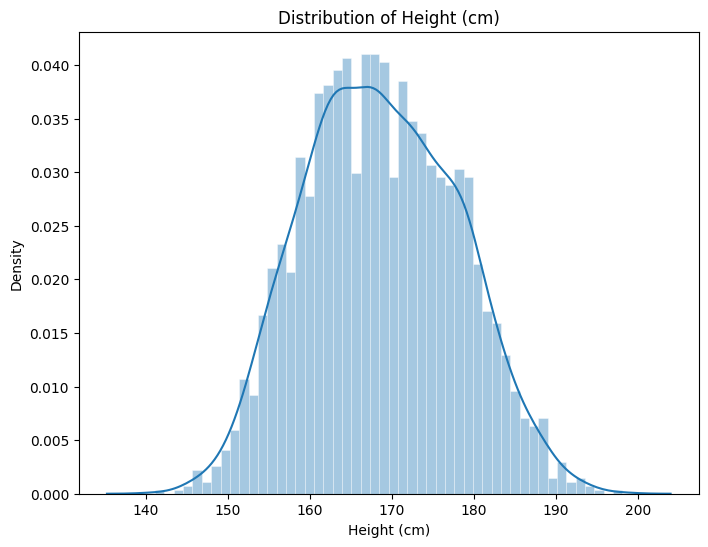

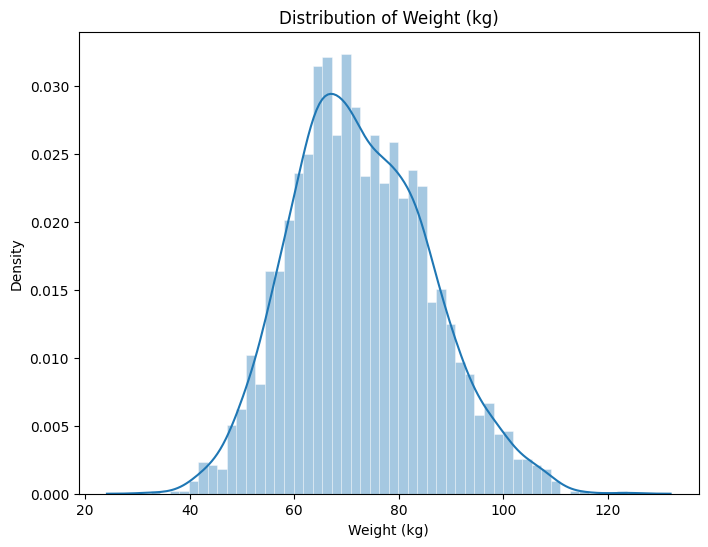

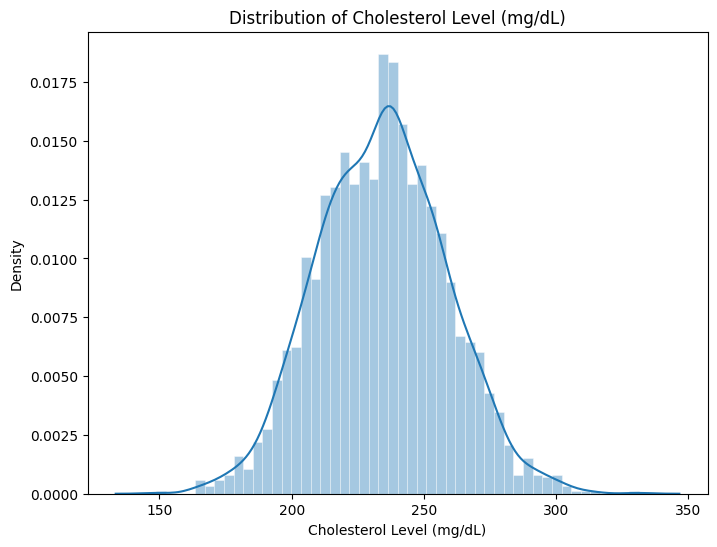

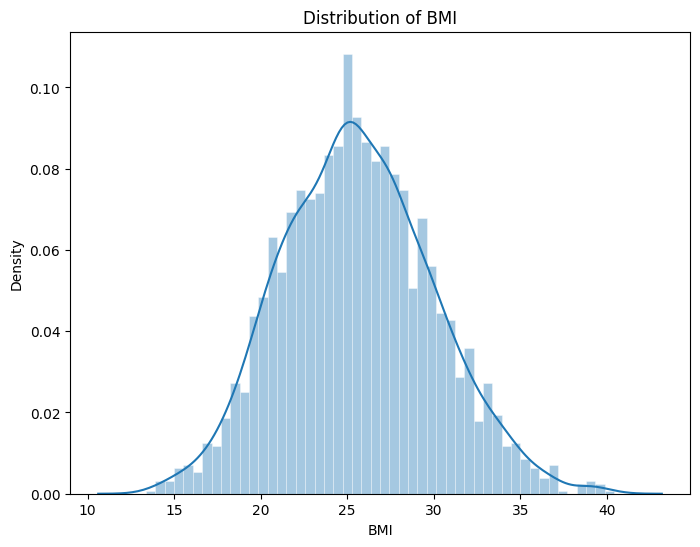

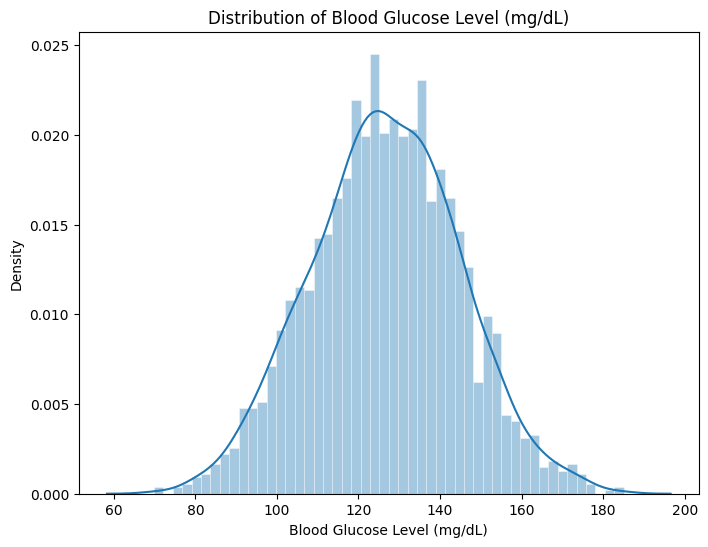

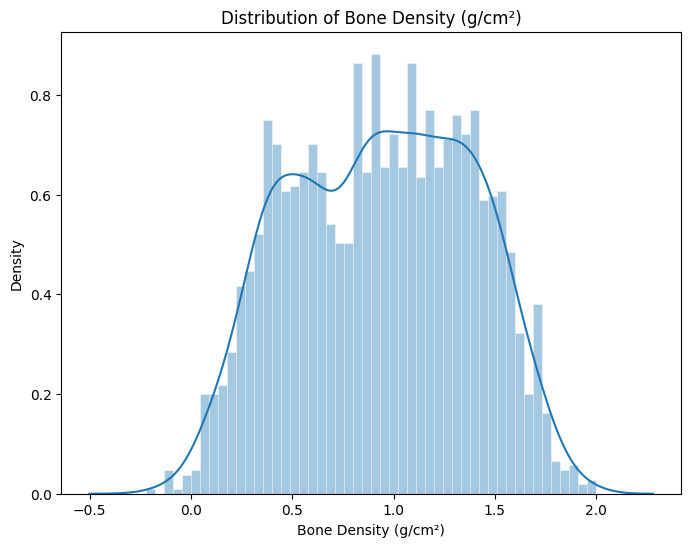

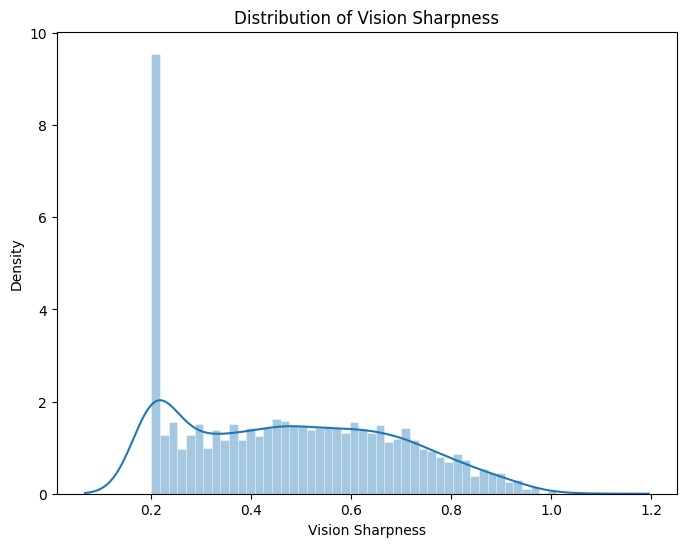

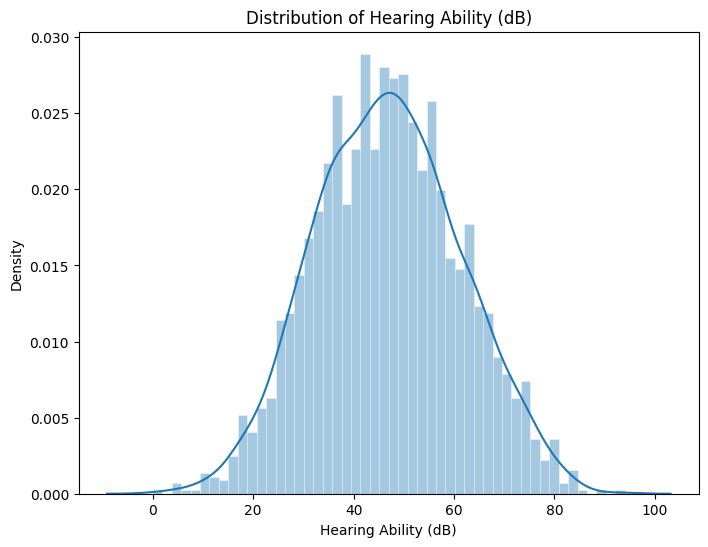

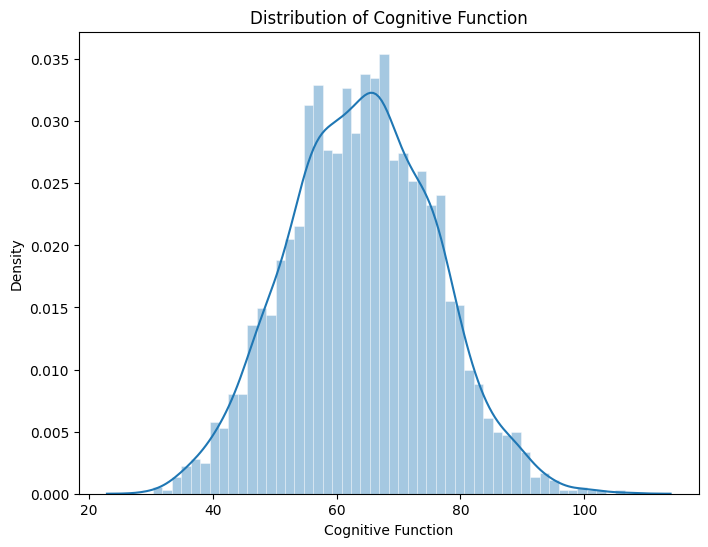

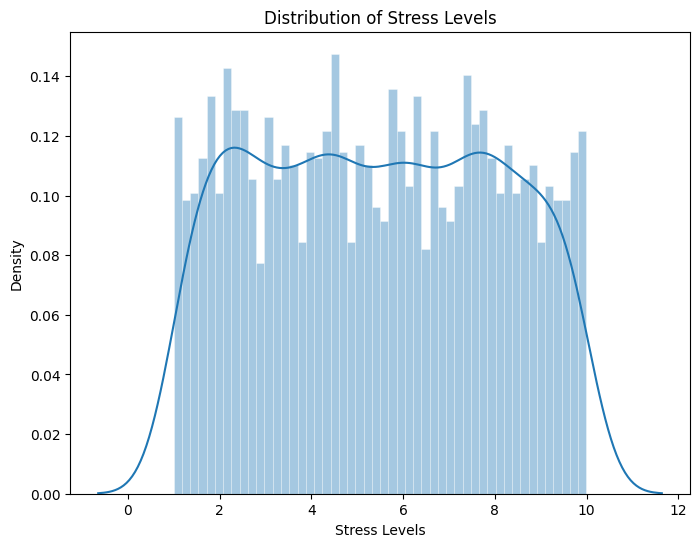

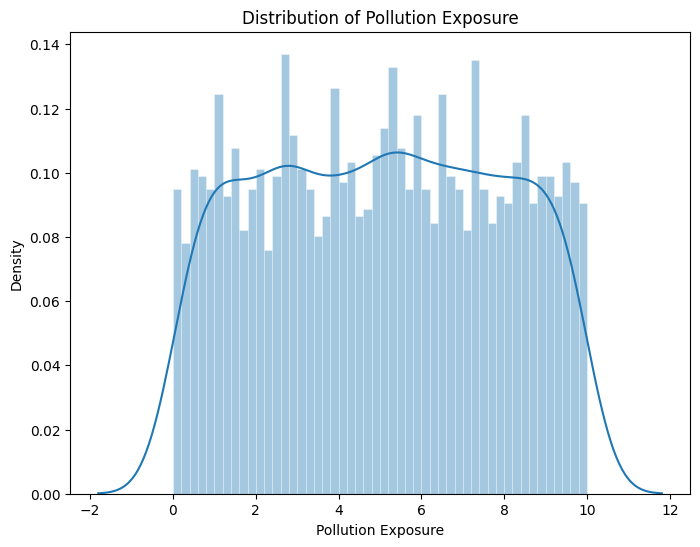

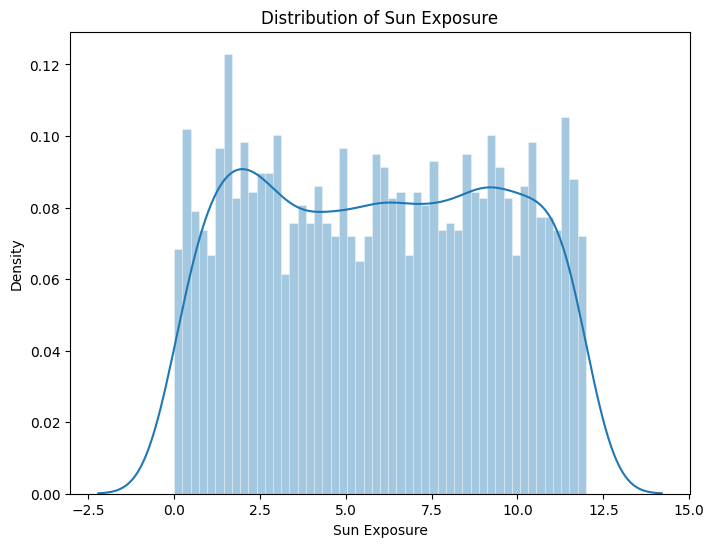

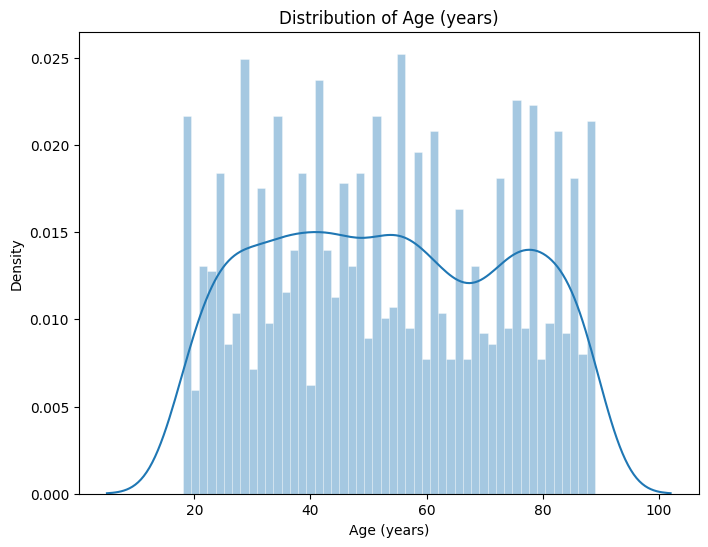

In [26]:
numeric_columns = df.select_dtypes(include='number').columns

# Loop through each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=3),
                 alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

####  Shapiro-Wilk Test

In [27]:
import pandas as pd
from scipy.stats import shapiro

# Assuming 'df' is your DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Set significance level
alpha = 0.05

# Loop through each numeric column and perform the Shapiro-Wilk test
for col in numeric_columns:
    # Drop null values from the column before performing the test
    stat, p_value = shapiro(df[col].dropna())
    
    # Print the results
    print(f"Shapiro-Wilk test for {col}:")
    print(f"    Test Statistic: {stat}")
    print(f"    P-value: {p_value}")
    
    # Interpretation of the result
    if p_value > alpha:
        print(f"    {col} looks normally distributed \n")
    else:
        print(f"    {col} does not look normally distributed \n")


Shapiro-Wilk test for Height (cm):
    Test Statistic: 0.9945773033931226
    P-value: 1.2257416317650968e-07
    Height (cm) does not look normally distributed 

Shapiro-Wilk test for Weight (kg):
    Test Statistic: 0.9941089106031387
    P-value: 3.862838994696219e-08
    Weight (kg) does not look normally distributed 

Shapiro-Wilk test for Cholesterol Level (mg/dL):
    Test Statistic: 0.9992927104555867
    P-value: 0.520787768340562
    Cholesterol Level (mg/dL) looks normally distributed 

Shapiro-Wilk test for BMI:
    Test Statistic: 0.9970388753623497
    P-value: 0.00015145344369956
    BMI does not look normally distributed 

Shapiro-Wilk test for Blood Glucose Level (mg/dL):
    Test Statistic: 0.9992508356125268
    P-value: 0.4621223512899909
    Blood Glucose Level (mg/dL) looks normally distributed 

Shapiro-Wilk test for Bone Density (g/cm²):
    Test Statistic: 0.9806243361965385
    P-value: 1.8708493889188116e-17
    Bone Density (g/cm²) does not look normally dis

#### The numeric columns that have normal distribution are: Cholesterol Level, Blood Glucose Level, and Cognitive Function.

### Q-Q Plot of normally distributed columns

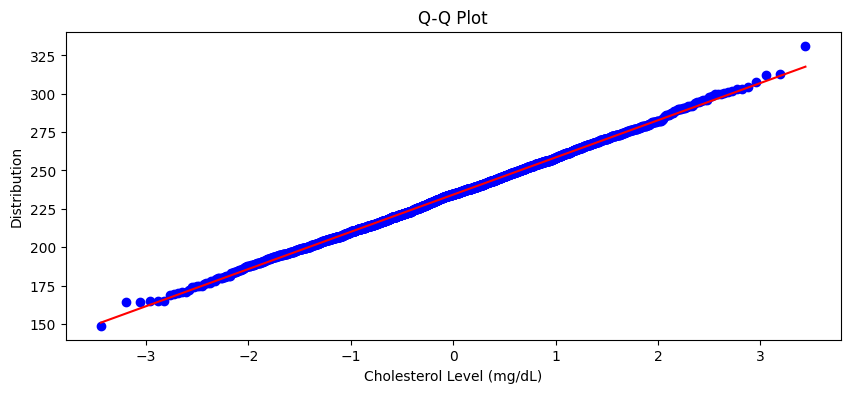

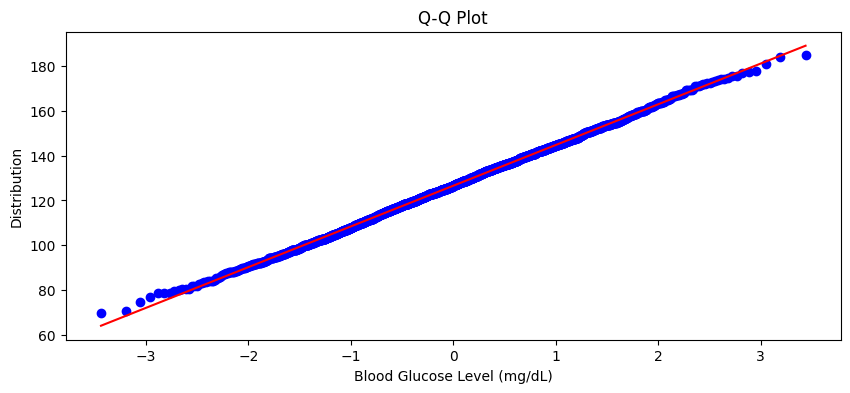

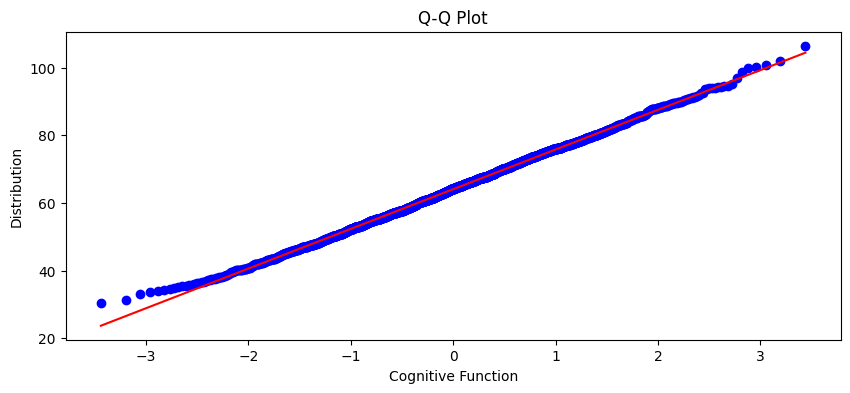

In [28]:
norm_cols = df[["Cholesterol Level (mg/dL)", "Blood Glucose Level (mg/dL)", "Cognitive Function"]]

for c in norm_cols:
    plt.figure(figsize=(10, 4))
    stats.probplot(df[c], plot=plt)
    plt.title("Q-Q Plot")
    plt.xlabel(c)
    plt.ylabel("Distribution")

#### 2-Way ANOVA Test for impact of Diet and Sleep Patterns

#### Levene's test (Homoskedasticity Test of Residuals)

In [29]:
from scipy.stats import levene
def Levene(name1,name2):
    # Assuming 'factor1' and 'factor2' are the two categorical variables
    for col in ['Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)',  'Cognitive Function']:
        # Group data by both factors
        unique_combinations = df.groupby([name1, name2])[col].apply(list)
    
        # Perform Levene's test across all combinations
        stat, p_value = levene(*unique_combinations)
    
        # Print results
        print(f"{col}: Levene's test p-value = {p_value}\n")
        if p_value > 0.05:
            print(f"Variances in {col} are equal (eligible for two-way ANOVA)\n")
        else:
            print(f"Variances in {col} are not equal (may not be eligible for two-way ANOVA)\n")


In [30]:
Levene('Diet','Sleep Patterns')

Cholesterol Level (mg/dL): Levene's test p-value = 0.30483359424524736

Variances in Cholesterol Level (mg/dL) are equal (eligible for two-way ANOVA)

Blood Glucose Level (mg/dL): Levene's test p-value = 0.935792130302965

Variances in Blood Glucose Level (mg/dL) are equal (eligible for two-way ANOVA)

Cognitive Function: Levene's test p-value = 0.43011770966804064

Variances in Cognitive Function are equal (eligible for two-way ANOVA)



### Cholesterol Level, Diet, and Sleep Patterns

In [31]:

# Sample data
data = {'cl':df['Cholesterol Level (mg/dL)'],
    'Diet':df['Diet'],'slp':df['Sleep Patterns']}

# Create a DataFrame
df_1 = pd.DataFrame(data)

model = ols('cl ~ Diet+ slp+Diet*slp' , data=df_1).fit()
#ols= (Ordinary Least Squares) 
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
pd.DataFrame(anova_table)


,sum_sq,df,F,PR(>F)
Diet,1.401628e+03,3.0,0.795606,0.496224
slp,4.497675e+02,2.0,0.382952,0.681888
Diet:slp,4.931852e+03,6.0,1.399734,0.210860
Residual,1.386466e+06,2361.0,NaN,NaN


### Cognitive Function, Diet, and Sleep Patterns

In [32]:

data = {'cg':df['Cognitive Function'],
    'Diet':df['Diet'],'slp':df['Sleep Patterns']}

# Create a DataFrame
df_2 = pd.DataFrame(data)

model = ols('cg ~ Diet+ slp+Diet*slp' , data=df_2).fit()
#ols= (Ordinary Least Squares) 
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
pd.DataFrame(anova_table)


,sum_sq,df,F,PR(>F)
Diet,491.141016,3.0,1.189586,0.312199
slp,108.860991,2.0,0.395506,0.673384
Diet:slp,819.883126,6.0,0.992914,0.428248
Residual,324926.349868,2361.0,NaN,NaN


### Blood Glucose Level, Diet, and Sleep Patterns

In [33]:

data = {'bg':df['Blood Glucose Level (mg/dL)'],
    'Diet':df['Diet'],'slp':df['Sleep Patterns']}

# Create a DataFrame
df_3 = pd.DataFrame(data)

model = ols('bg ~ Diet+ slp+Diet*slp' , data=df_3).fit()
#ols= (Ordinary Least Squares) 
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
pd.DataFrame(anova_table)


,sum_sq,df,F,PR(>F)
Diet,578.689010,3.0,0.581412,0.627205
slp,472.637234,2.0,0.712292,0.490624
Diet:slp,886.025858,6.0,0.445098,0.848821
Residual,783313.869708,2361.0,NaN,NaN


### 2-Way ANOVA Test for Mean of Blood Glucose Level for all Smoking Status and Physical Activity Level groups

In [34]:
Levene('Smoking Status','Physical Activity Level')

Cholesterol Level (mg/dL): Levene's test p-value = 0.1838622165262821

Variances in Cholesterol Level (mg/dL) are equal (eligible for two-way ANOVA)

Blood Glucose Level (mg/dL): Levene's test p-value = 0.9983094697434441

Variances in Blood Glucose Level (mg/dL) are equal (eligible for two-way ANOVA)

Cognitive Function: Levene's test p-value = 0.4561654590908607

Variances in Cognitive Function are equal (eligible for two-way ANOVA)



In [35]:
# Sample data
data = {'B_G':df['Blood Glucose Level (mg/dL)'],
    'SS':df['Smoking Status'],'PA':df['Physical Activity Level']
}

# Create a DataFrame
df_4 = pd.DataFrame(data)

# Define the model formula 
model = ols('B_G ~ PA+ SS+PA*SS', data=df_4).fit()
#ols= (Ordinary Least Squares) 
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
pd.DataFrame(anova_table)

,sum_sq,df,F,PR(>F)
PA,1576.747172,2.0,2.398519,0.091073
SS,5408.752123,2.0,8.227694,0.000275
PA:SS,1294.252920,4.0,0.984397,0.414740
Residual,777027.523865,2364.0,NaN,NaN


In [38]:
# Oneway Anova
data = {'B_G':df['Blood Glucose Level (mg/dL)'],
    'SS':df['Smoking Status'],'PA':df['Physical Activity Level']
}

# Create a DataFrame
df_4 = pd.DataFrame(data)

# Define the model formula 
model = ols('B_G ~ PA', data=df_4).fit()
#ols= (Ordinary Least Squares) 
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=1)

# Display the results
pd.DataFrame(anova_table)

,df,sum_sq,mean_sq,F,PR(>F)
PA,2.0,1536.920837,768.460419,2.323823,0.098122
Residual,2370.0,783730.528909,330.687987,NaN,NaN


#### 2-Way ANOVA Test for Mean of Cognitive Functions for all Smoking Status and Medication Use groups

In [37]:
Levene('Medication Use','Smoking Status')

Cholesterol Level (mg/dL): Levene's test p-value = 0.890223931171512

Variances in Cholesterol Level (mg/dL) are equal (eligible for two-way ANOVA)

Blood Glucose Level (mg/dL): Levene's test p-value = 0.9244008196582338

Variances in Blood Glucose Level (mg/dL) are equal (eligible for two-way ANOVA)

Cognitive Function: Levene's test p-value = 0.7610096837159671

Variances in Cognitive Function are equal (eligible for two-way ANOVA)



In [54]:
# Sample data
data = {'CF':df['Cognitive Function'],
    'Med_use':df['Medication Use'],'Sm_St':df['Smoking Status']
}

# Create a DataFrame
df_5 = pd.DataFrame(data)

# Define the model formula 
model = ols('CF ~ Med_use+ Sm_St+Sm_St*Med_use', data=df_5).fit()
#ols= (Ordinary Least Squares) 
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
pd.DataFrame(anova_table)

,sum_sq,df,F,PR(>F)
Med_use,41.906274,2.0,0.152902,0.858222
Sm_St,2200.227348,2.0,8.027907,0.000335
Sm_St:Med_use,163.461120,4.0,0.298208,0.879244
Residual,323953.527143,2364.0,NaN,NaN


#### 2-Way ANOVA Test for Mean of Cognitive Functions for all Smoking Status and Alcohol Consumption groups

In [47]:
Levene('Alcohol Consumption','Smoking Status')

Cholesterol Level (mg/dL): Levene's test p-value = 0.28712159715174934

Variances in Cholesterol Level (mg/dL) are equal (eligible for two-way ANOVA)

Blood Glucose Level (mg/dL): Levene's test p-value = 0.2898501203935827

Variances in Blood Glucose Level (mg/dL) are equal (eligible for two-way ANOVA)

Cognitive Function: Levene's test p-value = 0.7576232658091521

Variances in Cognitive Function are equal (eligible for two-way ANOVA)



In [55]:
# Sample data
data = {'CF':df['Cognitive Function'],
    'Alc':df['Alcohol Consumption'],'Sm_St':df['Smoking Status']
}

# Create a DataFrame
df_6 = pd.DataFrame(data)

# Define the model formula 
model = ols('CF ~ Sm_St+ Alc+Sm_St*Alc', data=df_6).fit()
#ols= (Ordinary Least Squares) 
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
pd.DataFrame(anova_table)

,sum_sq,df,F,PR(>F)
Sm_St,2168.341781,2.0,7.918812,0.000374
Alc,134.229406,2.0,0.490208,0.612562
Sm_St:Alc,367.547648,4.0,0.671144,0.611984
Residual,323657.117482,2364.0,NaN,NaN


# Chi-Square Test

## Assumptions check for Chi-Square:

In [33]:
def chi(data):
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(data)
    
    # Output the results
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)


### Effect of Mental Health Status on Sleep Patterns 

##### H0: There is no association between Sleep Patterns and Mental Health Status. In other words, the two variables are independent of each other.
##### H1: There is a significant association between Sleep Patterns and Mental Health Status. In other words, the two variables are not independent.

In [34]:
data_1=df.pivot_table(index='Sleep Patterns', columns='Mental Health Status', aggfunc='size', fill_value=0)
data_1

Mental Health Status,Excellent,Fair,Good,Poor
Sleep Patterns,,,,
Excessive,31,101,93,113
Insomnia,125,220,273,228
Normal,190,462,493,44


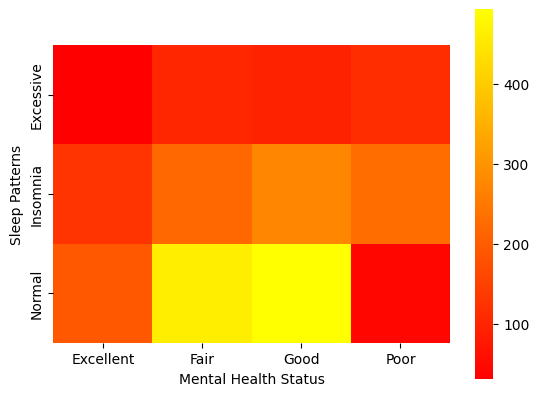

In [71]:
sns.heatmap(data_1, cmap='autumn', square=True)
plt.show()

In [35]:
chi(data_1)

Chi2 Statistic: 290.6768936061525
P-value: 8.128711523847043e-60
Degrees of Freedom: 6
Expected Frequencies:
[[ 49.28276443 111.52718078 122.35229667  54.83775811]
 [123.35271808 279.14791403 306.24273072 137.25663717]
 [173.36451749 392.32490518 430.40497261 192.90560472]]


### Effect of Chronic Diseases on Sleep Patterns

##### H0: There is no association between Sleep Patterns and Chronic Diseases. In other words, the two variables are independent of each other.
##### H1: There is a significant association between Sleep Patterns and Chronic Diseases. In other words, the two variables are not independent.

In [36]:
data_2=df.pivot_table(index='Sleep Patterns', columns='Chronic Diseases', aggfunc='size', fill_value=0)
data_2

Chronic Diseases,Diabetes,Heart Disease,Hypertension,None
Sleep Patterns,,,,
Excessive,62,47,81,148
Insomnia,133,133,207,373
Normal,204,208,253,524


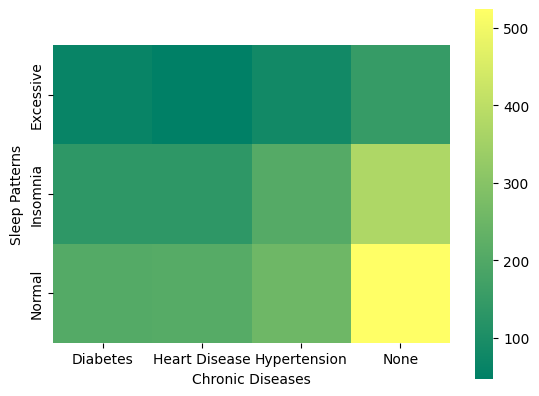

In [44]:
sns.heatmap(data_2, cmap='summer', square = True)
plt.show()

In [62]:
chi(data_2)

Chi2 Statistic: 5.992498012063134
P-value: 0.4240309857528408
Degrees of Freedom: 6
Expected Frequencies:
[[ 56.83185841  55.26506532  77.05773283 148.84534345]
 [142.24778761 138.32616941 192.87231353 372.55372946]
 [199.92035398 194.40876528 271.06995365 523.6009271 ]]


###  Relationship between Diet and Chronic Diseases

#### H0: There is no association between Diet and Chronic Diseases. In other words, the two variables are independent of each other.
#### H1: There is a significant association between Diet and Chronic Diseases. In other words, the two variables are not independent.

In [38]:
piv_ch1 =df.pivot_table(index='Diet', columns='Chronic Diseases', aggfunc='size', fill_value=0)
piv_ch1

Chronic Diseases,Diabetes,Heart Disease,Hypertension,None
Diet,,,,
Balanced,141,146,196,434
High-fat,102,80,143,214
Low-carb,83,78,112,211
Vegetarian,73,84,90,186


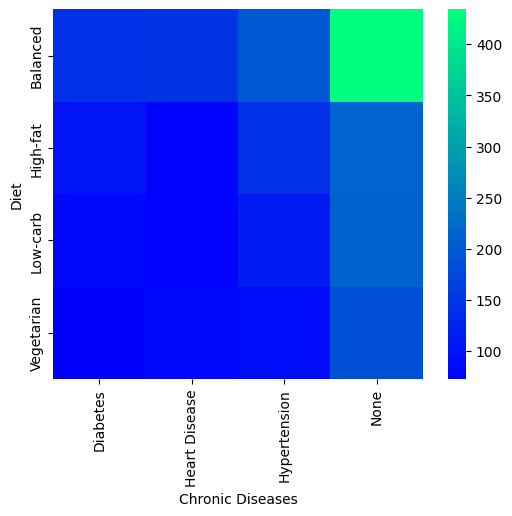

In [72]:
sns.heatmap(piv_ch1, cmap='winter', square = True)
plt.show()

In [61]:
chi(piv_ch1)

Chi2 Statistic: 15.513339947078364
P-value: 0.0777665010131087
Degrees of Freedom: 9
Expected Frequencies:
[[154.18584071 149.93510324 209.05899705 403.820059  ]
 [ 90.62831858  88.12979351 122.8820059  237.35988201]
 [ 81.38053097  79.13695744 110.34302571 213.13948588]
 [ 72.80530973  70.79814581  98.71597134 190.68057311]]


### Relationship between Medical Use and Physical Activity Level

#### H0: There is no association between Medication Use and Physical Activity. In other words, the two variables are independent of each other.
#### H1: There is a significant association between Medication Use and Physical Activity. In other words, the two variables are not independent.

In [65]:
data_4=df.pivot_table(index='Physical Activity Level', columns='Medication Use', aggfunc='size', fill_value=0)
data_4

Medication Use,None,Occasional,Regular
Physical Activity Level,,,
High,223,124,191
Low,296,189,260
Moderate,452,262,376


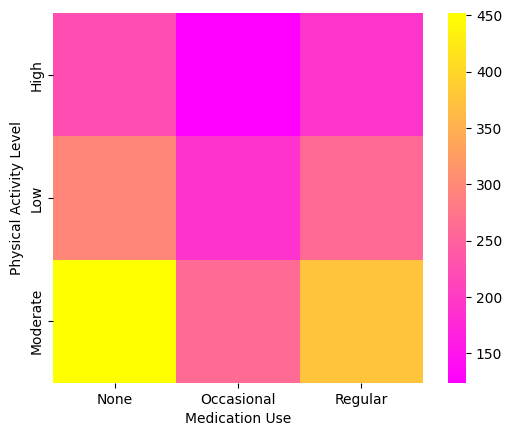

In [73]:
sns.heatmap(data_4, cmap='spring', square=True)
plt.show()

In [67]:
chi(data_4)

Chi2 Statistic: 1.2052707020709421
P-value: 0.877230070995891
Degrees of Freedom: 4
Expected Frequencies:
[[220.14243574 130.36241045 187.49515381]
 [304.84407922 180.52043826 259.63548251]
 [446.01348504 264.11715129 379.86936367]]


### Bonus Tests

In [57]:
df[['Gender','Education Level','Income Level']]

,Gender,Education Level,Income Level
1,Male,Undergraduate,Medium
4,Female,Undergraduate,High
5,Male,Undergraduate,Medium
6,Male,High School,Low
8,Female,High School,High
...,...,...,...
2992,Female,Undergraduate,Medium
2995,Male,Undergraduate,High
2996,Male,Undergraduate,Medium
2997,Male,Undergraduate,Low


### Education Level's Effect on Income Level 

In [63]:
data_3= df.pivot_table(index='Income Level', columns='Education Level', aggfunc='size', fill_value=0)
data_3

Education Level,High School,Postgraduate,Undergraduate
Income Level,,,
High,252,193,244
Low,274,184,264
Medium,357,229,376


In [47]:
chi(data_3)

Chi2 Statistic: 4.551536186524887
P-value: 0.3364802852167185
Degrees of Freedom: 4
Expected Frequencies:
[[256.37884534 175.95195954 256.66919511]
 [268.65823852 184.37926675 268.96249473]
 [357.96291614 245.6687737  358.36831016]]


##### P value is greater than significance. Hence, we can conclude that Education Level doesn't have significant effect on a person's Income Level according to this dataset.

### Gender's Effect on Income Level

In [48]:
data_4= df.pivot_table(index='Income Level', columns='Gender', aggfunc='size', fill_value=0)
data_4

Gender,Female,Male
Income Level,,
High,330,359
Low,361,361
Medium,502,460


In [49]:
chi(data_4)

Chi2 Statistic: 2.983161074967379
P-value: 0.22501672696288377
Degrees of Freedom: 2
Expected Frequencies:
[[346.38727349 342.61272651]
 [362.9776654  359.0223346 ]
 [483.6350611  478.3649389 ]]


##### P value is greater than significance. Hence, we can conclude that Gender doesn't have significant effect on a person's Income Level according to this dataset.